<a href="https://colab.research.google.com/github/artakhm/HomeCredit/blob/master/home_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive  
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [6]:
train = pd.read_csv('/content/drive/My Drive/HomeCredit/train.csv')

In [7]:
train.shape

(307511, 546)

In [9]:
train.head()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_nan,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,9.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,9.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [10]:
X=train.drop(columns=['TARGET', 'Unnamed: 0','SK_ID_CURR'])
y=train['TARGET']

## Undersampling

Пока бустинги - не нужно

In [ ]:
# !pip install imbalanced-learn
# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# undersample = RandomUnderSampler(sampling_strategy=0.5)
# X_und, y_und = undersample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Кодировка

In [ ]:
# cat_cols = [col for col in train.columns if train[col].dtype == 'object']
# train = pd.get_dummies(train, columns= cat_cols, dummy_na= True)

In [ ]:
# !pip install category_encoders

In [ ]:
# import category_encoders as ce

In [ ]:
# enc = OneHotEncoder(handle_unknown='ignore')
# X_ohe = enc.fit_transform(X)

## Feature Importances

In [ ]:
X['TARGET'] = y
correlations = X.corr()['TARGET'].sort_values()
X.drop(columns=['TARGET'], )
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031401
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.063368
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
DAYS_EMPLOYED_PERCENT        -0.049603
AMT_GOODS_PRICE              -0.039623
FLOORSMAX_AVG                -0.039385
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_MODE               -0.038377


In [ ]:
# !pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(cat_features=cat_cols, silent=True)
# model.fit(X[:200000], y[:200000])

In [ ]:
# feat_imps=model.get_feature_importance(prettified=True)

In [ ]:
# feat_imps= pd.read_csv('/content/drive/My Drive/HomeCredit/feat_imps_catboost.csv')

In [ ]:
# feat_imps

,Feature Id,Importances
0,EXT_SOURCE_3,11.637015
1,EXT_SOURCE_2,11.097899
2,CREDIT_TERM,9.143899
3,EXT_SOURCE_1,5.601932
4,DAYS_BIRTH,4.252969
...,...,...
120,FLAG_DOCUMENT_10,0.000147
121,FLAG_MOBIL,0.000000
122,FLAG_DOCUMENT_4,0.000000
123,FLAG_DOCUMENT_12,0.000000


In [ ]:
# feat_imps.to_csv('feat_imps_catboost.csv', index=False)

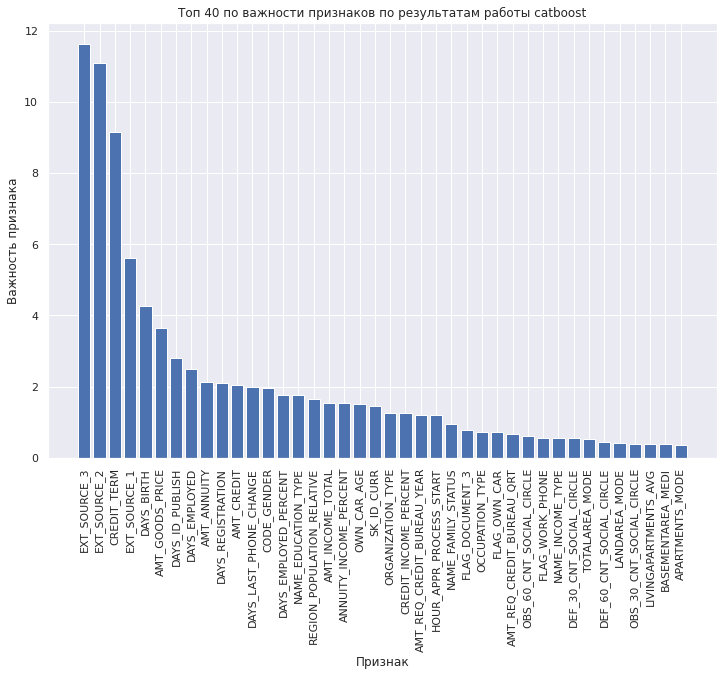

In [ ]:
# plt.figure(figsize=(12, 8))
# plt.xlabel('Признак')
# plt.ylabel('Важность признака')
# plt.title('Топ 40 по важности признаков по результатам работы catboost')
# plt.bar(feat_imps['Feature Id'][:40], feat_imps['Importances'][:40])
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# useful_cols = feat_imps[:30]['Feature Id'].to_list()

In [ ]:
# X = X[useful_cols]
# enc = OneHotEncoder(handle_unknown='ignore')
# X_ohe = enc.fit_transform(X)

## Модель

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
balance = train[train.TARGET ==0].TARGET.count() / train[train.TARGET ==1 ].TARGET.count()

In [100]:
gb_clf = XGBClassifier(n_estimators=1000,  tree_method='gpu_hist', objective= 'binary:logistic', eval_metric='auc', scale_pos_weight=balance).fit(X_train, y_train)

In [101]:
print('accuracy_score:', accuracy_score(y_test, gb_clf.predict(X_test)))
print('precision_score:', precision_score(y_test, gb_clf.predict(X_test)))
print('recall_score:', recall_score(y_test, gb_clf.predict(X_test)))
print('roc_auc_score:',roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1]))

accuracy_score: 0.7375249987805473
precision_score: 0.18626681614349777
recall_score: 0.6714487775308143
roc_auc_score: 0.7789197239076262


In [102]:
gb_clf = XGBClassifier(n_estimators=1000,  tree_method='gpu_hist', objective= 'binary:logistic', eval_metric='aucpr', scale_pos_weight=balance).fit(X_train, y_train)

In [103]:
print('accuracy_score:', accuracy_score(y_test, gb_clf.predict(X_test)))
print('precision_score:', precision_score(y_test, gb_clf.predict(X_test)))
print('recall_score:', recall_score(y_test, gb_clf.predict(X_test)))
print('roc_auc_score:',roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1]))

accuracy_score: 0.7375249987805473
precision_score: 0.18626681614349777
recall_score: 0.6714487775308143
roc_auc_score: 0.7789197239076262


In [115]:
feat_imp = pd.Series(gb_clf.feature_importances_, X_train.columns).sort_values(ascending=False)

In [116]:
feat_imp

NAME_EDUCATION_TYPE_Higher education    0.041088
EXT_SOURCE_2                            0.039189
EXT_SOURCE_3                            0.028958
FLAG_DOCUMENT_3                         0.024965
CODE_GENDER_M                           0.017756
                                          ...   
CREDIT_ACTIVE_nan                       0.000000
CREDIT_ACTIVE_Sold                      0.000000
CREDIT_ACTIVE_Closed                    0.000000
CREDIT_ACTIVE_Bad debt                  0.000000
PREV_NAME_YIELD_GROUP_nan_MEAN          0.000000
Length: 543, dtype: float32

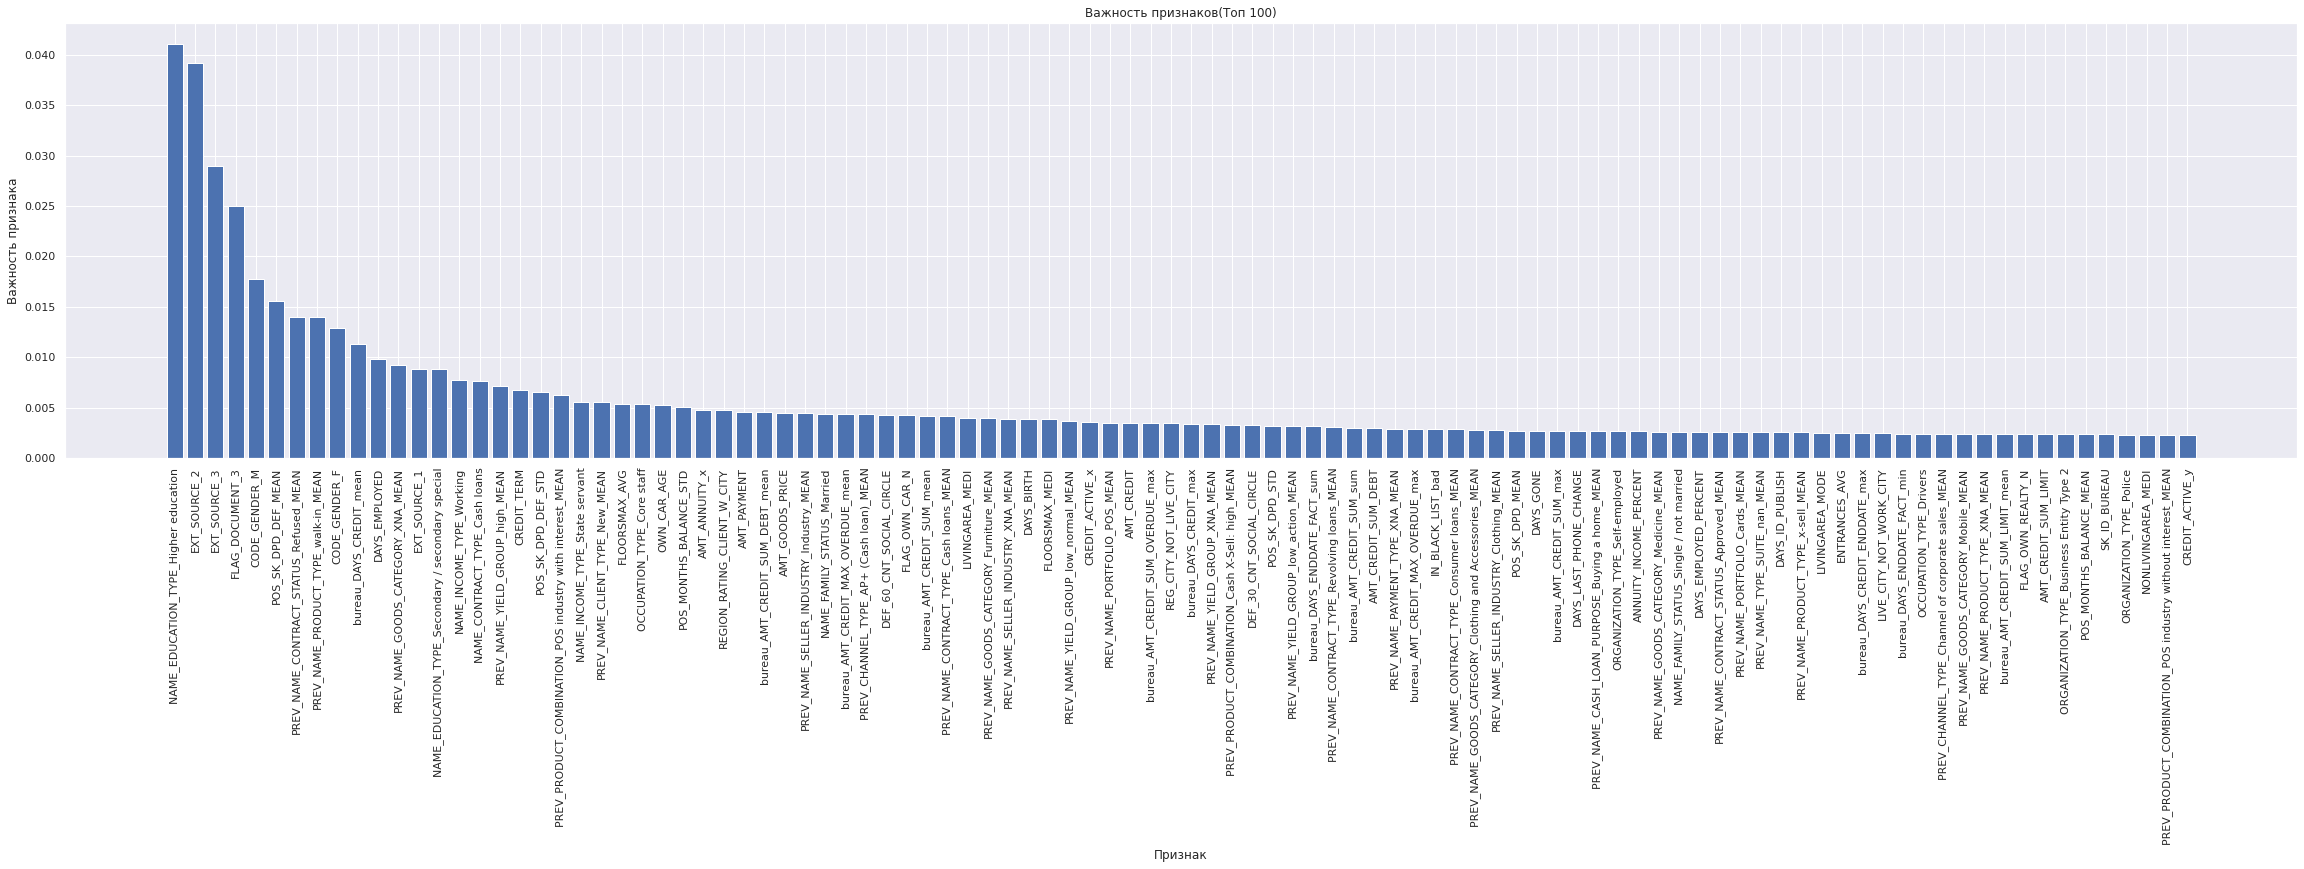

In [123]:
plt.figure(figsize=(40, 8))
plt.xlabel('Признак')
plt.ylabel('Важность признака')
plt.title('Важность признаков(Топ 100)')
plt.bar(feat_imp.index[:100],feat_imp[:100])
plt.xticks(rotation=90)
# plt.savefig('feature_importances_100')
plt.show()


In [124]:
import gc
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate

params = {
    'reg_alpha': [0, 0.25, 0.5],
    'reg_lambda': [0, 0.25, 0.5],
    'n_estimators': [200, 300, 500, 750],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.6, 0.9],
    'min_child_weight': [1e-1, 3, 5, 7],
    'max_depth': [i for i in range(2, 6)],
    'min_data_in_leaf': [50, 100, 150],
    'num_leaves': [32, 64]
}

model = LGBMClassifier(boosting_type='gbdt', random_state=42, n_jobs=-1,
                       subsample=0.7, pos_bagging_fraction=0.84, neg_bagging_fraction=0.1, verbose=-1)

grid = RandomizedSearchCV(model, params, scoring=[
    'accuracy', 'roc_auc'], cv=3, refit='roc_auc', n_jobs=1, n_iter=80, verbose=0, random_state=42)
grid.fit(X_train, y_train)
print(f'{grid.best_estimator_}, {grid.best_score_}')

KeyboardInterrupt: ignored

In [125]:

model = grid.best_estimator_
scores = cross_validate(model, X_train, y_train, scoring=[
                        'accuracy', 'roc_auc'], cv=3, return_train_score=True, n_jobs=1)

i_accuracy = np.mean(scores['test_accuracy'])
i_roc_auc = np.mean(scores['test_roc_auc'])

print('accuracy: %.3f | roc_auc: %.3f' % (i_accuracy, i_roc_auc))
gc.collect()

AttributeError: ignored